In [1]:
from google.colab import files
uploaded = files.upload()


Saving HAKIRI Sinda-Dataset.xlsx to HAKIRI Sinda-Dataset (1).xlsx


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [6]:

file_path = 'HAKIRI Sinda-Dataset.xlsx'
df = pd.read_excel(file_path, sheet_name='raw data')
df.head()


,Deal ID,Closed Won Reason,Annual contract value,Last Modified Date,Close Date,Deal Type,Expected Close Date,Number of times contacted,Number of Sales Activities,Original Source Type,...,Priority,Tags,Monthly recurring revenue,Deal Description,Forecast category,Amount in company currency,Create Date.1,Last Activity,Last contact,Closed Date
0,3974710472,NaN,NaN,2021-06-25 09:05:00,2021-01-01 04:56:00,NaN,NaT,40.0,55.0,Offline Sources,...,NaN,NaN,NaN,NaN,NaN,90000,2021-01-12,2021-06-25,6/25/21,2021-01-01
1,3355847518,NaN,NaN,2021-06-24 07:30:00,2020-11-02 02:38:00,NaN,NaT,42.0,70.0,Offline Sources,...,NaN,DAML,NaN,NaN,NaN,320000,2020-11-09,2021-06-24,6/24/21,2020-11-02
2,3355855817,NaN,NaN,2021-06-07 04:07:00,2020-08-04 02:37:00,NaN,NaT,12.0,15.0,Offline Sources,...,NaN,DAML,NaN,NaN,NaN,67000,2020-11-09,2021-06-07,2021-07-06 00:00:00,2020-08-04
3,3355889429,NaN,NaN,2021-03-21 13:56:00,2020-11-10 09:24:00,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09,NaT,NaN,2020-11-10
4,5501406833,NaN,NaN,2021-06-24 11:34:00,2021-06-24 11:34:00,New Business,2021-06-23,10.0,13.0,Offline Sources,...,NaN,NaN,NaN,Real Estate tokenization,NaN,30000,2021-06-22,2021-06-22,6/22/21,2021-06-24


In [7]:
# Check missing values
df.info()

# Convert relevant columns to dates
date_cols = ['Close Date', 'Create Date.1', 'Expected Close Date', 'Last Modified Date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Convert deal amount to numeric
df['Amount in company currency'] = (
    df['Amount in company currency']
    .astype(str)
    .str.replace(',', '')  # remove commas
    .str.extract('(\d+\.?\d*)')[0]
    .astype(float)
)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 45 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Deal ID                                       305 non-null    int64         
 1   Closed Won Reason                             0 non-null      float64       
 2   Annual contract value                         0 non-null      float64       
 3   Last Modified Date                            305 non-null    datetime64[ns]
 4   Close Date                                    78 non-null     datetime64[ns]
 5   Deal Type                                     75 non-null     object        
 6   Expected Close Date                           12 non-null     datetime64[ns]
 7   Number of times contacted                     154 non-null    float64       
 8   Number of Sales Activities                    154 non-null    float64 

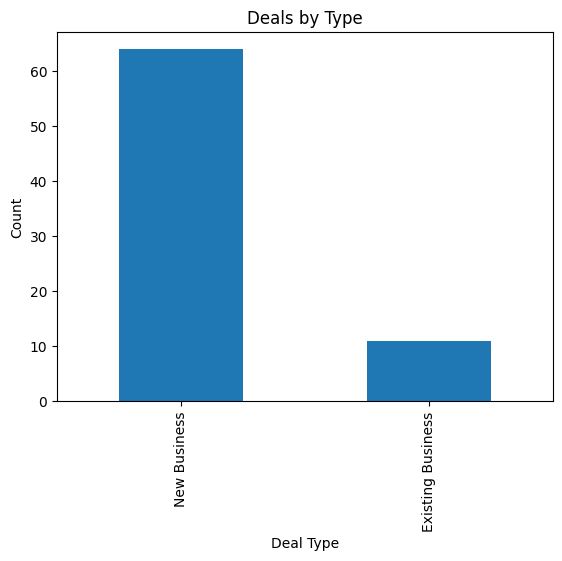

In [14]:
# Bar plot of deal types
#This gives us a sense of what kind of deals are most common in the dataset.
df['Deal Type'].value_counts().plot(kind='bar', title='Deals by Type')
plt.xlabel("Deal Type")
plt.ylabel("Count")
plt.show()
# Observation: If 'New Business' is much higher than others, it shows the company focuses more on acquiring new clients.



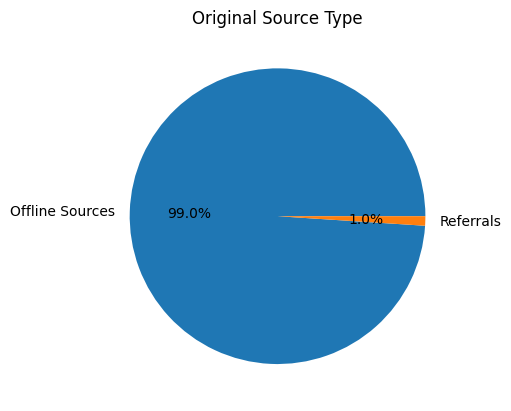

In [9]:
df['Original Source Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Original Source Type')
plt.ylabel("")
plt.show()


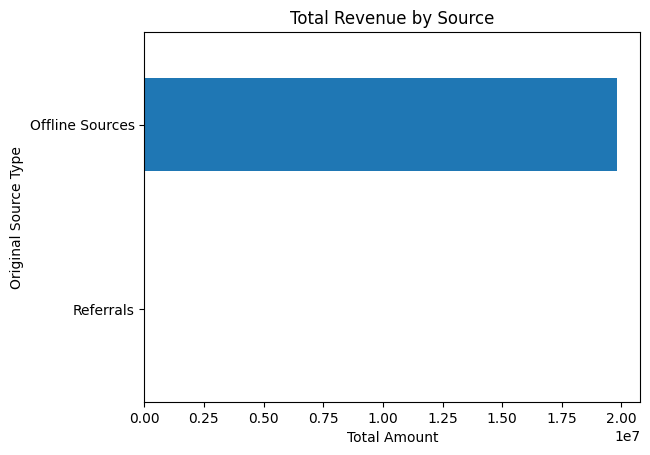

In [10]:
revenue_by_source = df.groupby('Original Source Type')['Amount in company currency'].sum()
revenue_by_source.sort_values().plot(kind='barh', title='Total Revenue by Source')
plt.xlabel("Total Amount")
plt.show()


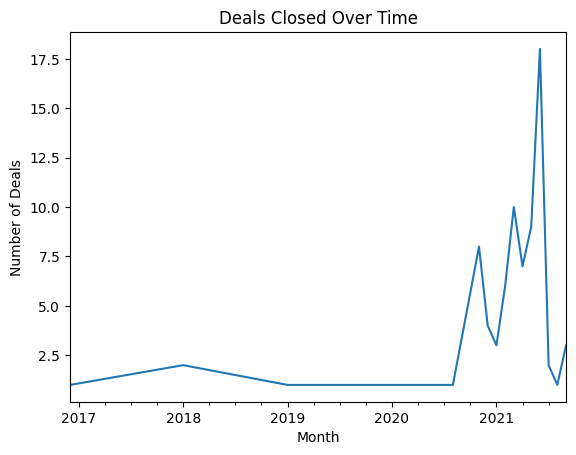

In [11]:
df['Close Month'] = df['Close Date'].dt.to_period('M')
df['Close Month'].value_counts().sort_index().plot(kind='line', title='Deals Closed Over Time')
plt.xlabel("Month")
plt.ylabel("Number of Deals")
plt.show()


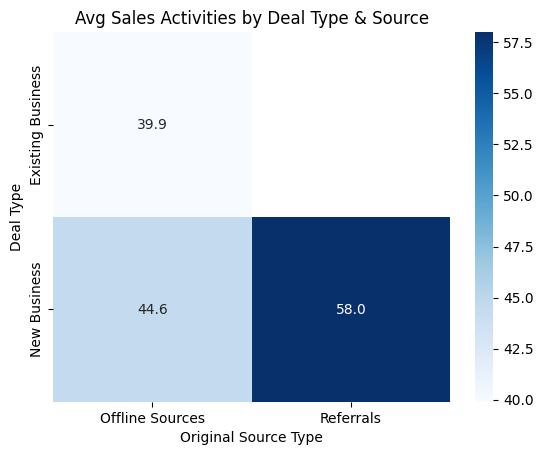

In [12]:
pivot = df.pivot_table(values='Number of Sales Activities',
                       index='Deal Type',
                       columns='Original Source Type',
                       aggfunc='mean')
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="Blues")
plt.title("Avg Sales Activities by Deal Type & Source")
plt.show()
